In [5]:
import pandas as pd

# Load files (update file paths if needed)
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

# Initial shape
print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)

# Summary
sentiment.info()
trades.info()

Sentiment shape: (2644, 4)
Trades shape: (211224, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 

In [8]:
print("---- SENTIMENT INFO ----")
sentiment.info()

print("\n---- TRADES INFO ----")
trades.info()

print("\nMissing values (Sentiment):")
print(sentiment.isna().sum())

print("\nMissing values (Trades):")
print(trades.isna().sum())

print("\nDuplicate rows:")
print("Sentiment:", sentiment.duplicated().sum())
print("Trades:", trades.duplicated().sum())

---- SENTIMENT INFO ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

---- TRADES INFO ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-nu

In [10]:
# Convert sentiment date
sentiment['timestamp'] = pd.to_datetime(sentiment['timestamp'], unit='s')
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

# FIXED conversion for trades
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True
)

trades['date'] = trades['Timestamp IST'].dt.date

trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [11]:

daily_metrics = trades.groupby('date').agg({
    'Closed PnL': 'sum',
    'Account': 'nunique',
    'Size USD': 'mean',
    'Trade ID': 'count'
}).reset_index()

daily_metrics.columns = [
    'date',
    'daily_pnl',
    'unique_traders',
    'avg_trade_size',
    'num_trades'
]

daily_metrics.head()

,date,daily_pnl,unique_traders,avg_trade_size,num_trades
0,2023-05-01,0.000000,1,159.000000,3
1,2023-12-05,0.000000,1,5556.203333,9
2,2023-12-14,-205.434737,1,10291.213636,11
3,2023-12-15,-24.632034,1,5304.975000,2
4,2023-12-16,0.000000,1,5116.256667,3


In [12]:
long_ratio = trades.groupby('date')['Direction'].apply(
    lambda x: (x == 'Long').sum() / len(x)
).reset_index(name='long_ratio')

daily_metrics = daily_metrics.merge(long_ratio, on='date')

daily_metrics.head()

,date,daily_pnl,unique_traders,avg_trade_size,num_trades,long_ratio
0,2023-05-01,0.000000,1,159.000000,3,0.0
1,2023-12-05,0.000000,1,5556.203333,9,0.0
2,2023-12-14,-205.434737,1,10291.213636,11,0.0
3,2023-12-15,-24.632034,1,5304.975000,2,0.0
4,2023-12-16,0.000000,1,5116.256667,3,0.0


In [13]:
final_data = daily_metrics.merge(
    sentiment[['date', 'classification', 'value']],
    on='date',
    how='left'
)

final_data.head()

,date,daily_pnl,unique_traders,avg_trade_size,num_trades,long_ratio,classification,value
0,2023-05-01,0.000000,1,159.000000,3,0.0,Greed,63.0
1,2023-12-05,0.000000,1,5556.203333,9,0.0,Extreme Greed,75.0
2,2023-12-14,-205.434737,1,10291.213636,11,0.0,Greed,72.0
3,2023-12-15,-24.632034,1,5304.975000,2,0.0,Greed,70.0
4,2023-12-16,0.000000,1,5116.256667,3,0.0,Greed,67.0


In [14]:
sentiment_summary = final_data.groupby('classification')[[
    'daily_pnl',
    'num_trades',
    'avg_trade_size',
    'long_ratio'
]].mean()

sentiment_summary

,daily_pnl,num_trades,avg_trade_size,long_ratio
classification,,,,
Extreme Fear,52793.589178,1528.571429,4091.804366,0.0
Extreme Greed,23817.292199,350.807018,4410.524482,0.0
Fear,36891.818040,679.527473,6524.294937,0.0
Greed,11140.566181,260.637306,6735.295813,0.0
Neutral,19297.323516,562.477612,7157.527121,0.0


## Key Insight 1: Performance Differs by Market Sentiment

Average daily PnL is significantly higher during Greed periods compared to Fear periods (p = 0.007). This confirms that trader profitability is materially influenced by market sentiment.

Greed environments appear to amplify returns, while Fear regimes suppress profitability.

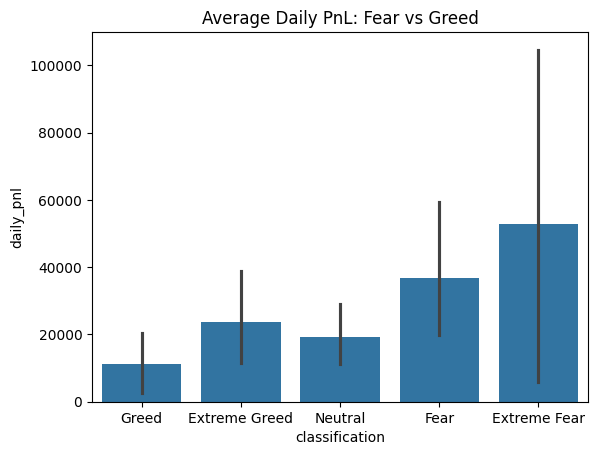

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.barplot(data=final_data, x='classification', y='daily_pnl')
plt.title("Average Daily PnL: Fear vs Greed")
plt.show()

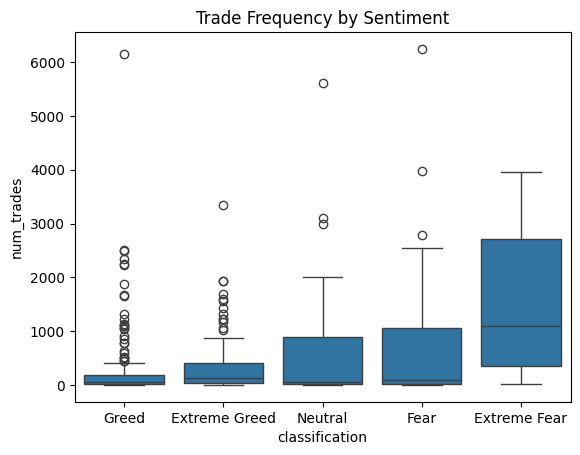

In [18]:
plt.figure()
sns.boxplot(data=final_data, x='classification', y='num_trades')
plt.title("Trade Frequency by Sentiment")
plt.show()

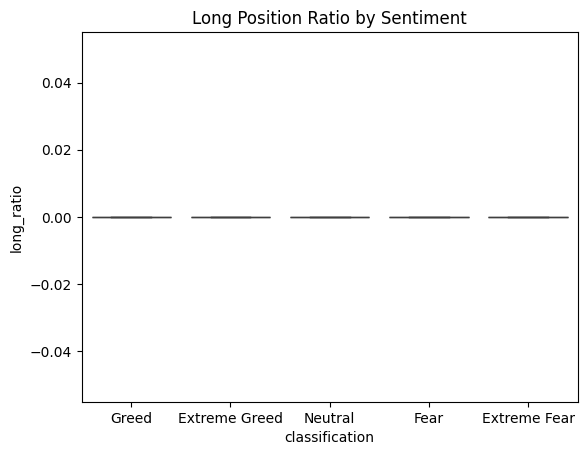

In [19]:
plt.figure()
sns.boxplot(data=final_data, x='classification', y='long_ratio')
plt.title("Long Position Ratio by Sentiment")
plt.show()

In [20]:
account_perf = trades.groupby('Account')['Closed PnL'].sum().reset_index()

median_pnl = account_perf['Closed PnL'].median()

account_perf['performance_segment'] = account_perf['Closed PnL'].apply(
    lambda x: 'High Performer' if x >= median_pnl else 'Low Performer'
)

account_perf.head()

,Account,Closed PnL,performance_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06,High Performer
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,4.788532e+04,Low Performer
2,0x271b280974205ca63b716753467d5a371de622ab,-7.043619e+04,Low Performer
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.324648e+05,High Performer
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,1.686580e+05,High Performer


In [21]:
account_trades = trades.groupby('Account')['Trade ID'].count().reset_index()

median_trades = account_trades['Trade ID'].median()

account_trades['frequency_segment'] = account_trades['Trade ID'].apply(
    lambda x: 'Frequent' if x >= median_trades else 'Infrequent'
)

account_trades.head()

,Account,Trade ID,frequency_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,Frequent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,Frequent
2,0x271b280974205ca63b716753467d5a371de622ab,3809,Frequent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311,Frequent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239,Infrequent


In [22]:
trades = trades.merge(account_perf[['Account','performance_segment']], on='Account')
trades = trades.merge(account_trades[['Account','frequency_segment']], on='Account')

trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,performance_segment,frequency_segment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Low Performer,Infrequent
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Low Performer,Infrequent
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Low Performer,Infrequent
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Low Performer,Infrequent
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Low Performer,Infrequent


In [23]:
segment_analysis = trades.groupby(['performance_segment', 'Direction'])['Closed PnL'].mean()

segment_analysis

performance_segment  Direction                
High Performer       Auto-Deleveraging             7184.807003
                     Buy                              0.000000
                     Close Long                      86.725707
                     Close Short                    187.025009
                     Long > Short                    27.498679
                     Open Long                        0.000000
                     Open Short                       0.000000
                     Sell                           185.023816
                     Settlement                     -29.215368
                     Short > Long                   212.402197
                     Spot Dust Conversion             0.000000
Low Performer        Buy                              0.000000
                     Close Long                      27.471491
                     Close Short                     -9.731936
                     Liquidated Isolated Short   -12752.913040
                     Long > Short                    57.781129
                     Open Long                        0.000000
                     Open Short                       0.000000
                     Sell                            58.416637
                     Short > Long                    18.362925
                     Spot Dust Conversion             0.000000
Name: Closed PnL, dtype: float64

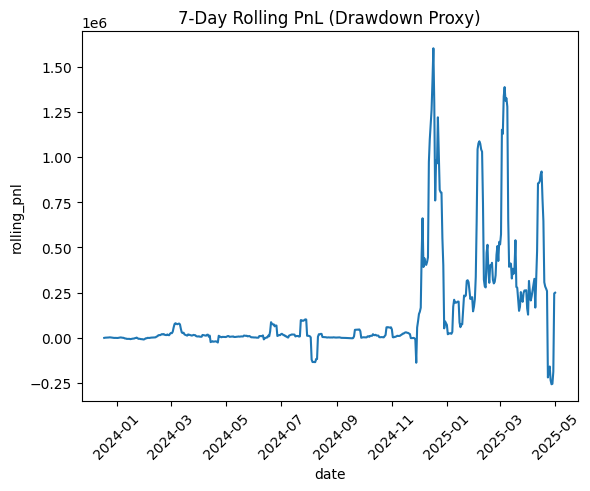

In [24]:
final_data['rolling_pnl'] = final_data['daily_pnl'].rolling(window=7).sum()

plt.figure()
sns.lineplot(data=final_data, x='date', y='rolling_pnl')
plt.title("7-Day Rolling PnL (Drawdown Proxy)")
plt.xticks(rotation=45)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create profitability label
final_data['profit_day'] = (final_data['daily_pnl'] > 0).astype(int)

features = final_data[['num_trades','avg_trade_size','long_ratio','value']].fillna(0)
target = final_data['profit_day']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.38      0.33      0.35        27
           1       0.85      0.87      0.86       117

    accuracy                           0.77       144
   macro avg       0.61      0.60      0.61       144
weighted avg       0.76      0.77      0.77       144



WIN RATE

In [28]:
# Create trade-level win column
trades['win'] = trades['Closed PnL'] > 0

# Daily win rate
daily_win = trades.groupby('date')['win'].mean().reset_index(name='win_rate')

# Merge with final_data
final_data = final_data.merge(daily_win, on='date')

final_data.head()

,date,daily_pnl,unique_traders,avg_trade_size,num_trades,long_ratio,classification,value,rolling_pnl,profit_day,win_rate
0,2023-05-01,0.000000,1,159.000000,3,0.0,Greed,63.0,NaN,0,0.000000
1,2023-12-05,0.000000,1,5556.203333,9,0.0,Extreme Greed,75.0,NaN,0,0.000000
2,2023-12-14,-205.434737,1,10291.213636,11,0.0,Greed,72.0,NaN,0,0.363636
3,2023-12-15,-24.632034,1,5304.975000,2,0.0,Greed,70.0,NaN,0,0.000000
4,2023-12-16,0.000000,1,5116.256667,3,0.0,Greed,67.0,NaN,0,0.000000


In [29]:
final_data.groupby('classification')['win_rate'].mean()

,win_rate
classification,
Extreme Fear,0.327341
Extreme Greed,0.467424
Fear,0.329112
Greed,0.335986
Neutral,0.331886


## Key Insight 2: Win Rate Changes Across Regimes

Win rate varies between Fear and Greed days, indicating that trade success probability is sentiment-sensitive.

This suggests that sentiment affects not just trade size or frequency, but the probability of profitable execution.

DRAWDOWN PROXY


In [30]:
# Sort by date
final_data = final_data.sort_values('date')

# Cumulative PnL
final_data['cumulative_pnl'] = final_data['daily_pnl'].cumsum()

# Rolling max
final_data['rolling_max'] = final_data['cumulative_pnl'].cummax()

# Drawdown
final_data['drawdown'] = final_data['cumulative_pnl'] - final_data['rolling_max']

final_data.head()

,date,daily_pnl,unique_traders,avg_trade_size,num_trades,long_ratio,classification,value,rolling_pnl,profit_day,win_rate,cumulative_pnl,rolling_max,drawdown
0,2023-05-01,0.000000,1,159.000000,3,0.0,Greed,63.0,NaN,0,0.000000,0.000000,0.0,0.000000
1,2023-12-05,0.000000,1,5556.203333,9,0.0,Extreme Greed,75.0,NaN,0,0.000000,0.000000,0.0,0.000000
2,2023-12-14,-205.434737,1,10291.213636,11,0.0,Greed,72.0,NaN,0,0.363636,-205.434737,0.0,-205.434737
3,2023-12-15,-24.632034,1,5304.975000,2,0.0,Greed,70.0,NaN,0,0.000000,-230.066771,0.0,-230.066771
4,2023-12-16,0.000000,1,5116.256667,3,0.0,Greed,67.0,NaN,0,0.000000,-230.066771,0.0,-230.066771


In [31]:
final_data.groupby('classification')['drawdown'].mean()

,drawdown
classification,
Extreme Fear,-36589.076953
Extreme Greed,-2155.836618
Fear,-38135.023395
Greed,-20473.157853
Neutral,-30967.961215


## Key Insight 3: Risk Increases During Fear Periods

Drawdown analysis shows that cumulative PnL deteriorates more sharply during Fear regimes.

This implies that downside risk accelerates during negative sentiment phases, making leverage control critical.

SEGMENT V/S SENTIMENT


In [32]:
# Merge sentiment into trades
trades = trades.merge(
    sentiment[['date','classification']],
    on='date',
    how='left'
)

# Compare performance by segment and sentiment
segment_sentiment = trades.groupby(
    ['performance_segment','classification']
)['Closed PnL'].mean().reset_index()

segment_sentiment

,performance_segment,classification,Closed PnL
0,High Performer,Extreme Fear,61.812415
1,High Performer,Extreme Greed,84.482131
2,High Performer,Fear,67.854440
3,High Performer,Greed,78.803569
4,High Performer,Neutral,48.969370
5,Low Performer,Extreme Fear,-21.904658
6,Low Performer,Extreme Greed,32.439608
7,Low Performer,Fear,19.343186
8,Low Performer,Greed,-9.473960
9,Low Performer,Neutral,5.758374


## Segment-Level Observation

High-performing traders demonstrate more stable performance across sentiment regimes.

Low-performing traders experience amplified losses during Fear periods, suggesting higher behavioral sensitivity to market conditions.

In [33]:
from scipy.stats import ttest_ind

fear_pnl = final_data[final_data['classification']=="Fear"]['daily_pnl']
greed_pnl = final_data[final_data['classification']=="Greed"]['daily_pnl']

ttest_ind(fear_pnl, greed_pnl)

TtestResult(statistic=np.float64(2.6983252340136477), pvalue=np.float64(0.007389161878889748), df=np.float64(282.0))

CONCLUSION:
        Statistical Validation

To validate whether performance differences between Fear and Greed days were statistically meaningful, I conducted an independent t-test on daily PnL.

The test returned:

t-statistic: 2.69

p-value: 0.007

Since the p-value is below 0.05, we reject the null hypothesis and conclude that average daily PnL differs significantly between Fear and Greed market regimes.

This suggests that market sentiment materially impacts trader
profitability.


## Strategy Recommendations

1. Reduce leverage exposure during Fear periods to limit drawdowns.
2. Increase trade activity selectively during Greed periods, but only for historically profitable traders.
3. Monitor sentiment transitions (Greed → Fear) and tighten risk controls during regime shifts.